In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install jieba
!pip install gensim

In [72]:
import jieba.analyse as analyse
  
#製圖模組
import matplotlib.pyplot as plt
from PIL import Image

In [76]:
import jieba
train = []
stopwords = open('stopwords.txt','r',encoding='utf8').read()
fp = open('作業文章.txt','r',encoding='utf8')
for words in fp:
  seg=jieba.cut_for_search(words)
  train.append([ word for word in seg if len(word)>1 and word not in stopwords ])
print(train)
print(len(train))

[['電容', '需求', '出貨額連', '13', '突破', '千億日圓', '破紀錄', '提振日廠', '電子', '零件', '出貨額', '連續', '13', '突破', '000', '億日', '圓大關', '年來', '新高', '水準'], ['日本', '電子', '情報', '技術', '產業', '協會', 'JEITA', '11', '30', '公布', '統計', '數據', '指出', '因電容', '需求', '帶動', '2021', '月份', '日本', '電子', '零件', '全球', '出貨金額', '去年', '同月', '揚升', '10.0%', '796', '億日圓', '連續', '13', '呈現', '增長', '增幅', '連續', '位數', '10%', '以上', '出貨額', '連續', '13', '突破', '000', '億日', '圓大關', '創近', '年來', '2018', '10', '以來', '800', '億日圓', '新高', '水準'], ['區域', '情況', '月份', '日廠', '日本', '國內', '電子', '零件', '出貨額', '去年', '同月', '成長', '23.0%', '821', '億日圓', '美洲', '出貨額', '成長', '8.3%', '349', '億日圓', '歐洲', '出貨額', '成長', '7.1%', '350', '億日圓', '智慧', '手機', '電子', '機器', '組裝廠', '群聚', '中國', '市場', '出貨額', '萎縮', '2.5%', '408', '億日圓', '對亞洲', '其他', '地區', '出貨額', '成長', '24.1%', '862', '億日圓'], ['主要', '品項', '月份', '日廠', '被動', '元件', '出貨額', '去年', '同月', '大增', '16%', '763', '億日圓', '其中', '電容出', '貨額', '去年', '同月', '大增', '17%', '294', '億日圓', '連續', '16', '呈現', '增長', '出貨額', '連續', '13', '突破', '千億日', '圓大關

In [77]:
from gensim import corpora
from gensim.corpora import Dictionary #用來為每個出現在文本中的單詞分配了一個獨一無二的整數編號
from gensim.models import LdaModel

word_id = corpora.Dictionary(train) #幫單詞分配編號
#print(word_id)
#for number, word_ids in word_id.iteritems():    #顯示詞的編號
  #print(number, word_ids)

In [78]:
word_num = [word_id.doc2bow(text) for text in train ]    #計算詞頻向量bow,(0,3)表編號0之文字出現3次
print(word_num)

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(0, 1), (1, 2), (2, 1), (3, 1), (6, 1), (7, 1), (9, 1), (10, 1), (12, 1), (13, 3), (14, 1), (15, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1)], [(3, 5), (14, 1), (15, 2), (31, 5), (37, 1), (38, 1), (49, 1), (50, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 4), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1)], [(1, 1), (3, 4), (6, 1), (9, 1), (12, 1), (13, 2), (27, 1), (31, 5), (37, 2), (38, 2), (39, 1

In [79]:
lda = LdaModel(corpus=word_num, id2word=word_id, num_topics=5)     #corpus：詞頻向量    
print(lda)                                 

LdaModel(num_terms=704, num_topics=5, decay=0.5, chunksize=2000)


In [80]:
lda_list=lda.print_topics(5) #呈現五個主題
print("5個主題的詞彙分布:\n")
lda_list[0]
for topic in lda_list:
  print(topic)

5個主題的詞彙分布:

(0, '0.015*"億日圓" + 0.015*"出貨額" + 0.012*"連續" + 0.011*"日本" + 0.010*"萬人" + 0.010*"月份" + 0.009*"減少" + 0.009*"13" + 0.009*"MLCC" + 0.008*"呈現"')
(1, '0.017*"日本" + 0.015*"成長" + 0.014*"出貨額" + 0.013*"去年" + 0.012*"億日圓" + 0.009*"10" + 0.009*"同月" + 0.008*"月份" + 0.008*"增加" + 0.008*"電子"')
(2, '0.016*"一部" + 0.015*"去年" + 0.015*"東證" + 0.011*"同月" + 0.011*"類股" + 0.011*"萬人" + 0.009*"指數" + 0.008*"減少" + 0.008*"增加" + 0.007*"交易"')
(3, '0.027*"日本" + 0.023*"太陽能" + 0.019*"面板" + 0.008*"億日圓" + 0.007*"10" + 0.007*"下滑" + 0.007*"生產" + 0.007*"30" + 0.007*"去年" + 0.006*"出貨量"')
(4, '0.027*"日本" + 0.021*"月份" + 0.012*"10" + 0.012*"較前" + 0.011*"上揚" + 0.008*"新高" + 0.008*"下滑" + 0.007*"2021" + 0.007*"萬人" + 0.007*"30"')


In [93]:
#轉字典
word = []
weight = []
for index, topic in lda.show_topics(formatted=False, num_words= 10):
    # print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))
    word.append([w[0] for w in topic])
    weight.append([w[1] for w in topic])

In [83]:
new_key = {}
for i in range(4):
  for j in range(10):
    if word[i][j] in new_key:
      if new_key[word[i][j]] > weight[i][j]:
        #print(word[i][j],new_key[word[i][j]],weight[i][j])
        pass
      elif new_key[word[i][j]] == weight[i][j]:
        pass
      else:
        # print(word[i][j],new_key[word[i][j]],weight[i][j])
        new_key[word[i][j]] = weight[i][j]
    else:
      new_key[word[i][j]] = weight[i][j]

In [84]:
import numpy as np
from PIL import Image 

sp_mask1 = np.array(Image.open('/content/drive/MyDrive/大學/NLP/swallow.jpg'))

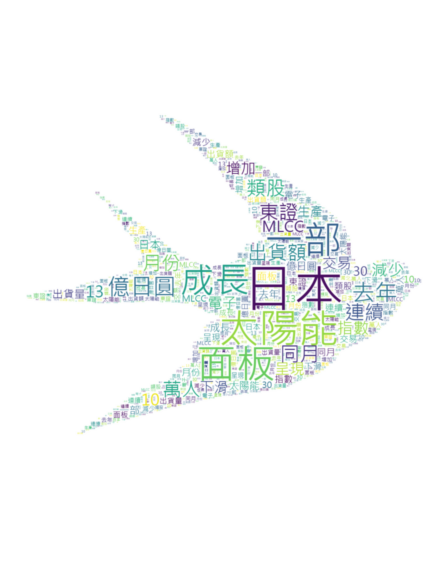

In [85]:
from wordcloud import WordCloud 
wc = WordCloud(font_path="/content/drive/MyDrive/大學/NLP/WORDTYPE.ttf", repeat=True,background_color="white",
               max_words=2000, mask=sp_mask1,colormap="viridis")

wc.generate_from_frequencies(new_key)#輸入欲繪製文字雲之文件(須為+)

plt.figure(figsize=(8,6), dpi=120)   #figsize(調整圖案寬和高)  dpi(參數指定繪圖對象的分辨率,即每英吋多少像素)) 
plt.imshow(wc, interpolation='gaussian')  #繪製圖片
plt.axis("off")   #是否顯示坐標尺
plt.show()
